In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

Data Pre Processing

In [4]:
df=pd.read_csv("D:\FirstUniv\DataSet\diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Handling Missing Values

In [9]:
df[['x', 'y', 'z']]=df[['x', 'y', 'z']].replace(0,np.NaN)
df.dropna(inplace=True)
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Removing Outliers via IQR

In [20]:
def outliers_iqr(df, feat):
    q25, q75 = np.percentile(df[feat], q=[25, 75])
    iqr = q75 - q25
    upp_lmt = q75 + iqr*1.45
    lwr_lmt = q25 - iqr*1.45
    return df[(df[feat] > upp_lmt) | (df[feat] < lwr_lmt)].index.to_list()

<AxesSubplot:xlabel='carat'>

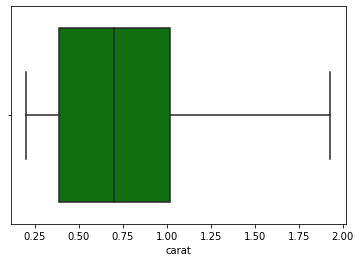

In [21]:
sns.boxplot(x=df['carat'], color="Green")

<AxesSubplot:xlabel='carat'>

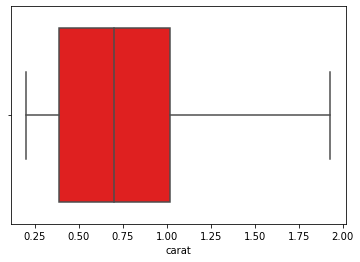

In [18]:
df.drop(outliers_iqr(df, 'carat'), inplace=True)
sns.boxplot(x=df['carat'], color="red")

<AxesSubplot:xlabel='depth'>

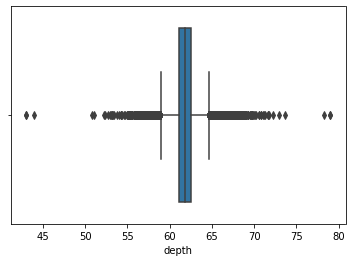

In [19]:
sns.boxplot(x=df['depth'])

<AxesSubplot:xlabel='depth'>

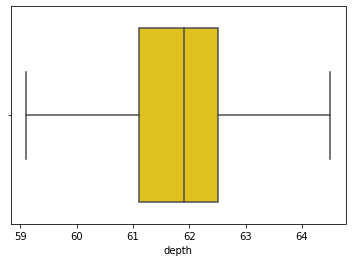

In [25]:
df.drop(outliers_iqr(df, 'depth'), inplace=True)
sns.boxplot(x=df['depth'], color="gold")

<AxesSubplot:xlabel='table'>

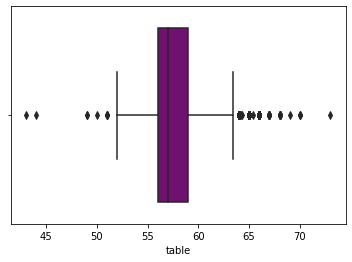

In [24]:
sns.boxplot(x=df['table'], color="purple")

<AxesSubplot:xlabel='table'>

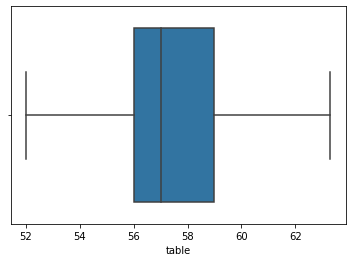

In [26]:
df.drop(outliers_iqr(df, 'table'), inplace=True)
sns.boxplot(x=df['table'])

<AxesSubplot:xlabel='x'>

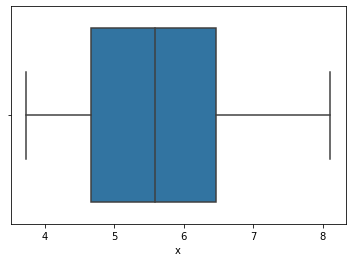

In [27]:
sns.boxplot(x=df['x'])

<AxesSubplot:xlabel='x'>

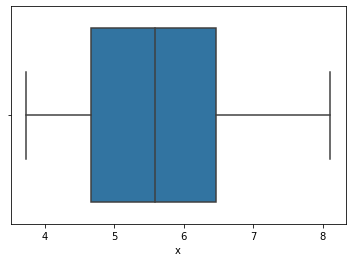

In [28]:
df.drop(outliers_iqr(df, 'x'), inplace=True)
sns.boxplot(x=df['x'])

<AxesSubplot:xlabel='y'>

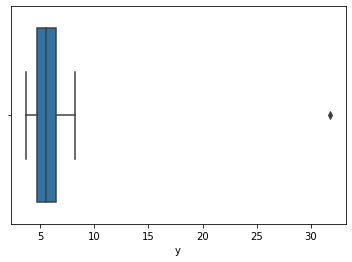

In [29]:
sns.boxplot(x=df['y'])

<AxesSubplot:xlabel='y'>

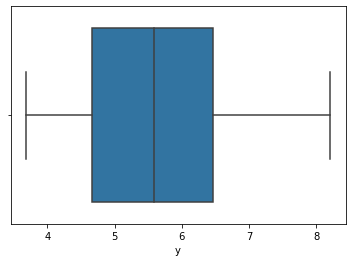

In [30]:
df.drop(outliers_iqr(df, 'y'), inplace=True)
sns.boxplot(x=df['y'])

<AxesSubplot:xlabel='z'>

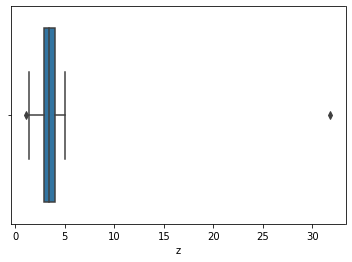

In [31]:
sns.boxplot(x=df['z'])

<AxesSubplot:xlabel='z'>

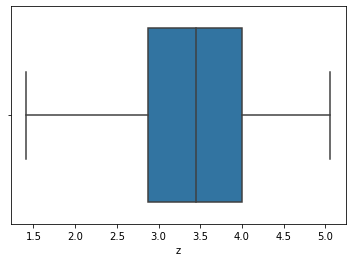

In [33]:
df.drop(outliers_iqr(df, 'z'), inplace=True)
sns.boxplot(x=df['z'])

In [34]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,48416.000000,48416.000000,48416.000000,48416.000000,48416.000000,48416.000000,48416.000000,48416.000000
mean,27178.172484,0.733209,61.803410,57.239931,3459.756795,5.600149,5.605107,3.462386
std,15725.556257,0.392913,1.060191,2.004477,3354.857275,1.016601,1.011061,0.628637
min,1.000000,0.200000,59.100000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,13346.750000,0.380000,61.200000,56.000000,905.750000,4.660000,4.670000,2.870000
50%,28318.500000,0.685000,61.900000,57.000000,2184.000000,5.590000,5.580000,3.450000
75%,40877.250000,1.020000,62.500000,59.000000,4914.000000,6.460000,6.460000,4.000000
max,53940.000000,1.930000,64.500000,63.300000,18806.000000,8.110000,8.210000,5.060000


# Dividing Data into Independent Features And Dependent Features



In [35]:
X = df.drop('price', axis=1)
y = df['price']

Data Visualization

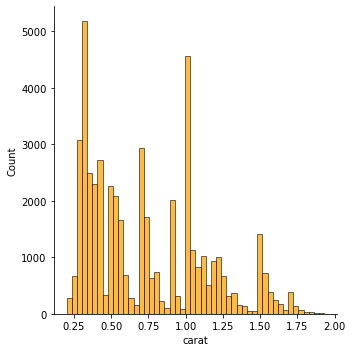

In [37]:
sns.displot(data = df, x='carat', kind='hist', color="orange")

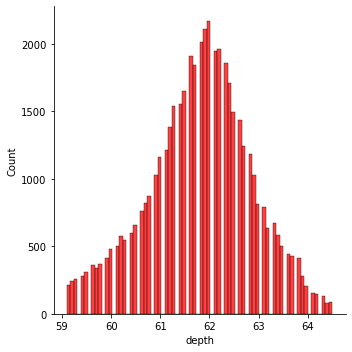

In [38]:
sns.displot(data = df, x='depth', kind='hist', color="red")

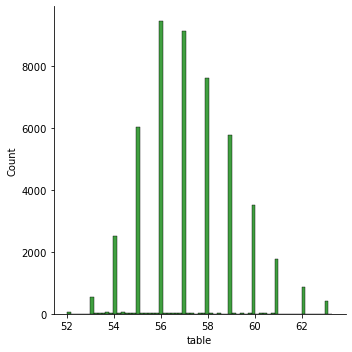

In [39]:
sns.displot(data = df, x='table', kind='hist', color="green")

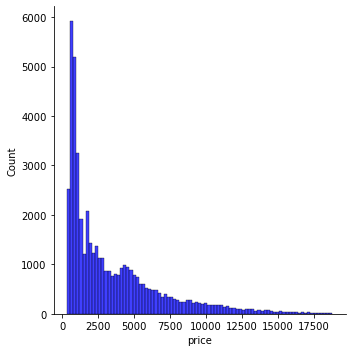

In [41]:
sns.displot(data = df, x='price', kind='hist', color="Blue")

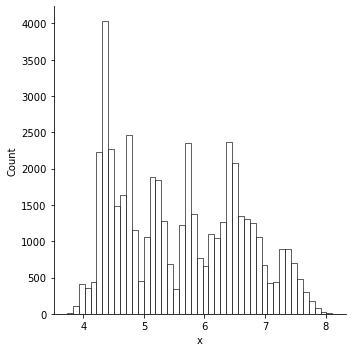

In [43]:
sns.displot(data = df, x='x', kind='hist', color="white")

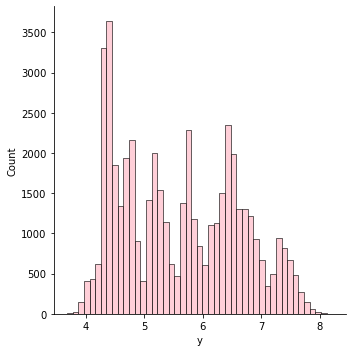

In [44]:
sns.displot(data = df, x='y', kind='hist', color="pink")

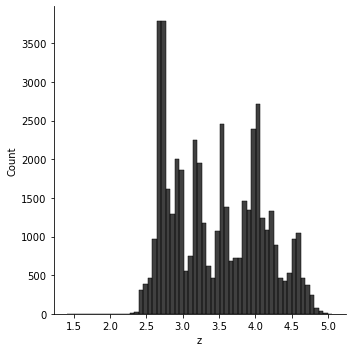

In [45]:
sns.displot(data = df, x='z', kind='hist', color="black")

Categorical Data Visulization

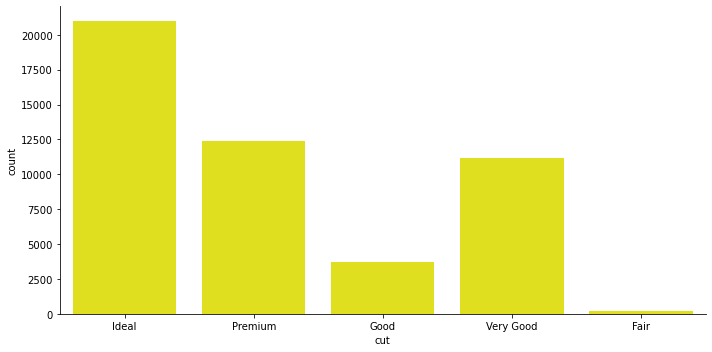

In [46]:
# Cut Data Visulization
p = sns.catplot(x='cut', data=df, kind='count', aspect=2, color="yellow")

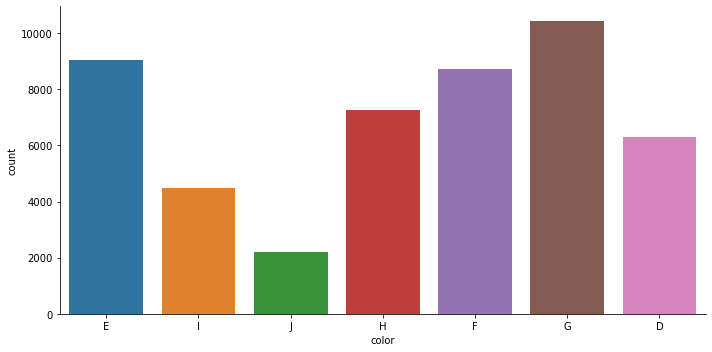

In [47]:
#Color Data Visulization
p = sns.catplot(x='color', data=df, kind='count', aspect=2)

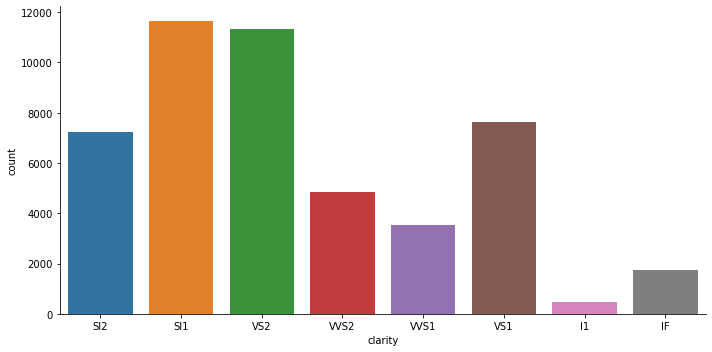

In [48]:
# Clarity Data Visualization
p = sns.catplot(x='clarity', data=df, kind='count', aspect=2)

Encoding Data Visulization

In [49]:
# Encoding The Data Using .get_dummies() from Pandas Library 
# Converting Unique Categorial data into further different columns to remove priorities that we get when using Label Encoder

def data_with_dummy_var(data):
    return pd.get_dummies(data)

X_clean = data_with_dummy_var(X)

In [50]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48416 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     48416 non-null  int64  
 1   carat          48416 non-null  float64
 2   depth          48416 non-null  float64
 3   table          48416 non-null  float64
 4   x              48416 non-null  float64
 5   y              48416 non-null  float64
 6   z              48416 non-null  float64
 7   cut_Fair       48416 non-null  uint8  
 8   cut_Good       48416 non-null  uint8  
 9   cut_Ideal      48416 non-null  uint8  
 10  cut_Premium    48416 non-null  uint8  
 11  cut_Very Good  48416 non-null  uint8  
 12  color_D        48416 non-null  uint8  
 13  color_E        48416 non-null  uint8  
 14  color_F        48416 non-null  uint8  
 15  color_G        48416 non-null  uint8  
 16  color_H        48416 non-null  uint8  
 17  color_I        48416 non-null  uint8  
 18  color_

<AxesSubplot:>

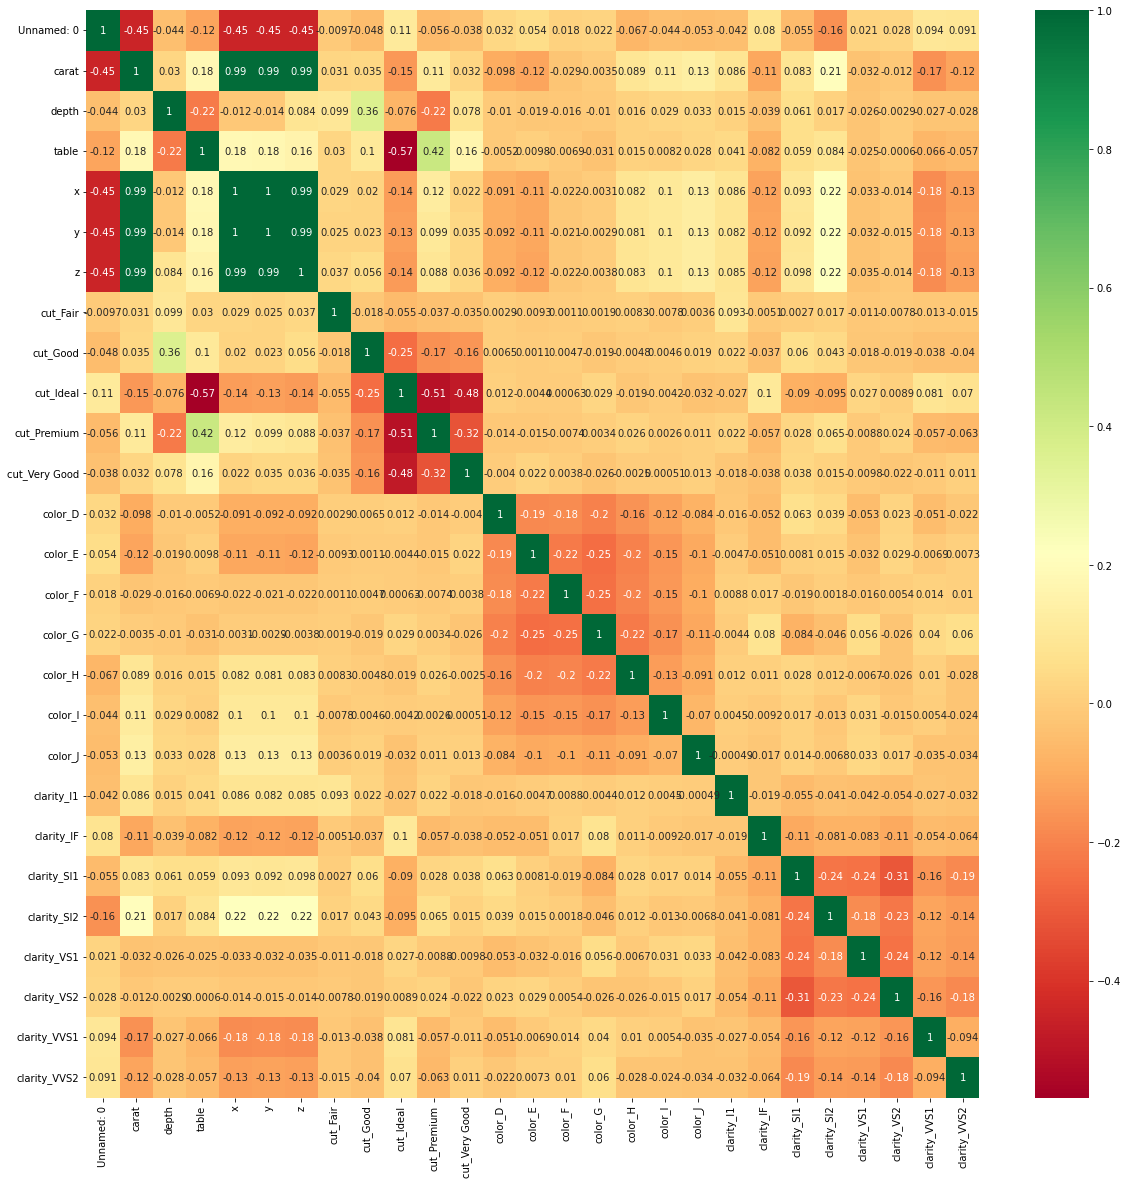

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(X_clean.corr(), annot=True,cmap='RdYlGn')

Splitting Data For Training and Testing Phase for Machine Learning Models

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_clean, y, test_size=0.2, random_state=1)

In [53]:
from sklearn.metrics import r2_score

Decision Tree Model

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_depth=13)
reg1.fit(xtrain, ytrain)

# Prediction
ypred =  reg1.predict(xtest)

# Checking Accuracy
r2_score(ytest, ypred)

0.9998383635097627

Random Forest Model

In [55]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

reg2 = RandomForestRegressor(n_estimators=29, max_depth=17, random_state=1) # Criterion = Squared Error by default
reg2.fit(xtrain, ytrain)

# Predicting using Xtest Data
ypred = reg2.predict(xtest)

# Checking Accuracy
r2_score(ytest, ypred)

0.9999641670570267

In [56]:
xtrain.describe()

,Unnamed: 0,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,...,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000,38732.000000
mean,27204.652690,0.733582,61.806122,57.230546,5.600539,5.605559,3.462842,0.004028,0.076707,0.434886,...,0.092507,0.044614,0.009320,0.035810,0.240550,0.148224,0.157854,0.233554,0.074176,0.100511
std,15694.281906,0.393741,1.058655,1.996265,1.017956,1.012441,0.629262,0.063337,0.266129,0.495748,...,0.289745,0.206458,0.096093,0.185819,0.427423,0.355326,0.364609,0.423097,0.262061,0.300684
min,1.000000,0.200000,59.100000,52.000000,3.730000,3.680000,1.410000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13449.750000,0.380000,61.200000,56.000000,4.660000,4.670000,2.870000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28326.000000,0.670000,61.900000,57.000000,5.580000,5.580000,3.450000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40849.500000,1.020000,62.500000,59.000000,6.460000,6.460000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53940.000000,1.930000,64.500000,63.000000,8.110000,8.210000,5.060000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Scaling
Scaling data from features to improve accuracy for Linear Regression Model

In [57]:
from sklearn.preprocessing import StandardScaler

# Assining object for our scaler
scaler = StandardScaler()
xtrain.iloc[:, :7] = scaler.fit_transform(xtrain.iloc[:, :7])
xtest.iloc[:, :7] = scaler.transform(xtest.iloc[:, :7])

In [58]:
xtrain.head()

,Unnamed: 0,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
7860,-1.232545,0.702040,0.466521,-0.115490,0.746074,0.804444,0.821859,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20473,-0.428866,1.895733,0.655443,0.886394,1.531973,1.604501,1.648235,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53109,1.650645,-0.085290,0.372060,-1.117374,0.117355,0.083405,0.138510,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30390,0.203029,-1.025006,0.277600,-2.119258,-1.100788,-1.091988,-1.069270,0,0,1,...,0,0,0,0,0,0,0,0,1,0
31017,0.242980,-1.075802,-2.178379,1.387336,-1.149907,-1.141374,-1.307648,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Linear Regression

In [59]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(xtrain, ytrain)

# Predict Data Values using X Test
ypred = reg3.predict(xtest)

# Checking Accuracy Via R2_Score library
r2_score(ytest, ypred)

0.9129947985551924

Training Model with Whole Data
Best Model Accuracy is ~0.98 with Random Forest Model

In [60]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=29, max_depth=17, random_state=1) # Criterion = Squared Error by default
regressor.fit(X_clean, y)

RandomForestRegressor(max_depth=17, n_estimators=29, random_state=1)